question5

Data preprocessing without generator

In [14]:
import tensorflow 
import keras  
import os
import glob 
from skimage import io 
import random 
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
import cv2

In [15]:
import os

dir = "C:/Users/Asus/.keras/datasets/weather_datasets"
entries = os.listdir(dir)
print(entries)

class_name = entries

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [23]:
base_image_size_w = 224
base_image_size_h = 224
base_image_size_d = 3
data_feature_len = base_image_size_w * base_image_size_h * base_image_size_d

datas = np.empty([data_feature_len, 0], dtype = np.float32)
labels = np.empty([0, 1], dtype = np.float32)
datas, labels

(array([], shape=(150528, 0), dtype=float32),
 array([], shape=(0, 1), dtype=float32))

In [24]:
import numpy as np
import cv2


# define variables
base_image_size_w = 224
base_image_size_h = 224
base_image_size_d = 3
data_feature_len = base_image_size_w * base_image_size_h * base_image_size_d

datas = np.empty([data_feature_len, 0], dtype = np.float32)
labels = np.empty([0, 1], dtype = np.float32)

# read image - resize - reshape sa data and labels
cnt = 0
for f in entries:
  imgs_name = os.listdir(dir + '/' + f)

  labels = np.append(labels, np.repeat(cnt, len(imgs_name)))
  cnt = cnt + 1

  for j in imgs_name:
    img = cv2.imread(dir +'/'+ f + '/' + j)
     
    img = cv2.resize(img, (base_image_size_w, base_image_size_h))
    img = np.reshape(img, (data_feature_len, -1))
    datas = np.append(datas, img, axis=1)
  print("finish current class")

print(labels.shape, datas.shape)

finish current class
finish current class
finish current class
finish current class
(80,) (150528, 80)


In [25]:
datas = np.transpose(datas, (1, 0))

In [26]:
datas

array([[126., 126., 126., ...,  54.,  54.,  54.],
       [222., 191., 176., ..., 169., 143., 113.],
       [179., 174., 175., ...,  72., 153., 126.],
       ...,
       [ 66.,  75., 132., ...,  75.,  63.,  45.],
       [ 39.,  41.,  83., ...,  39.,  43.,  78.],
       [ 39.,  25.,  37., ...,  38.,  38.,  50.]], dtype=float32)

In [27]:
# data reshape
labels = np.reshape(labels, (labels.shape[0], -1))
labels

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],

In [29]:
print(datas.shape, labels.shape)

(80, 150528) (80, 1)


In [30]:
# split data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(datas, labels, test_size=0.33, random_state=42)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((53, 150528), (27, 150528), (53, 1), (27, 1))

In [32]:
# one hot encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=len(np.unique(labels)))
y_test = to_categorical(y_test, num_classes=len(np.unique(labels)))

In [33]:
y_train, y_test

(array([[0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0.,

In [34]:
y_test.shape, y_train.shape

((27, 4), (53, 4))

In [35]:
print(np.max(X_train), np.min(X_test))

255.0 0.0


In [36]:
# data normalization
X_train  = X_train.astype(np.float32) / 255.
X_test = X_test.astype(np.float32) / 255.

In [37]:
print(np.max(X_train), np.min(X_test))

1.0 0.0


In [38]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype)

(53, 150528) (27, 150528) (53, 4) (27, 4)
float32 float32 float32 float32


In [39]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import l2

In [40]:
input_layer = Input((X_train.shape[1], )) # batch_size=16)

x = Dense(units=512, activation="relu", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(input_layer)
x = Dense(units=256, activation="relu", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(x)
x = Dense(units=128, activation="relu", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(x)

output_layer = Dense(units=y_train.shape[1], activation="softmax")(x)

In [41]:
classification_model = Model(input_layer, output_layer)

In [42]:
from tensorflow.keras.utils import plot_model

plot_model(classification_model,show_shapes=True, show_layer_names=True, )

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [43]:
from tensorflow.keras.optimizers import SGD, Adam

# loss function (different with regression)
classification_model.compile(optimizer=SGD(0.01, momentum=0.9),
                             loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [44]:
import tensorflow as tf
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, mode='max', restore_best_weights=True)

classification_model.fit(x=X_train, y=y_train, batch_size=32, epochs=5, callbacks=[early_stop])

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2/2 [==============================] - 3s 821ms/step - loss: 18.2324 - categorical_accuracy: 0.2264
Epoch 2/5
2/2 [==============================] - 2s 746ms/step - loss: 38.0668 - categorical_accuracy: 0.3208
Epoch 3/5
2/2 [==============================] - 2s 744ms/step - loss: 42.2937 - categorical_accuracy: 0.3019
Epoch 4/5
2/2 [==============================] -

<AxesSubplot:>

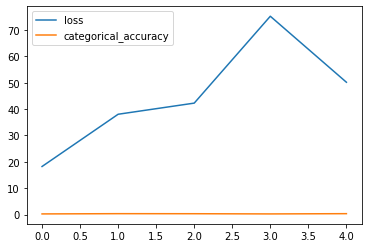

In [45]:
# plot model history
import pandas as pd


history = pd.DataFrame(classification_model.history.history)
history.plot()

In [46]:
result = classification_model.evaluate(X_test, y_test, batch_size=32,verbose=0)
print('accuracy : ', np.round(result[1]*100, 2))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
accuracy :  22.22
